# **Equipo 1**

### JARED EVANDER FUENTES SÁNCHEZ...............................................1868002

### ROBERTO CARLOS RANGEL MONTENEGRO......................................1751007

### HUMBERTO GERARDO PEÑA PAEZ....................................................1862464

### MARCO ANTONIO VAZQUEZ RIVERA.................................................1678576

# INDICACIONES

Considera el archivo "BankCluster.xlsx". Usando técnicas de aprendizaje no supervisado determina cuantos clusters de clientes puedes detectar. Justifica tu respuesta

 \\
**Nota:** se hicieron capturas a las gráficas creadas con la librería *plotly.express*. Las capturas están disponibles en el entregable 1 (checar índice).

## PCA

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/7mo Semestre/Introducción al Aprendizaje Automatico') #de Jared

In [ ]:
# Preparar el dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
import pandas as pd

bank = pd.read_excel('BankCluster.xlsx')

label = LabelEncoder()
bank['education'] = label.fit_transform(bank['education'])
bank['default'] = label.fit_transform(bank['default'])
bank['housing'] = label.fit_transform(bank['housing'])
bank['loan'] = label.fit_transform(bank['loan'])
bank['month'] = label.fit_transform(bank['month'])

bank = pd.get_dummies(bank, drop_first=True, 
                      columns=['marital', 'contact', 'poutcome'])

y = bank['job']
X = bank.drop(labels=['job', 'y'], axis = 1)
X = shuffle(X)

X = StandardScaler().fit_transform(X)

In [ ]:
bank

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,0,0,1787,0,0,19,10,79,1,-1,0,no,1,0,0,0,0,0,1
1,33,services,1,0,4789,1,1,11,8,220,1,339,4,no,1,0,0,0,0,0,0
2,35,management,2,0,1350,1,0,16,0,185,1,330,1,no,0,1,0,0,0,0,0
3,30,management,2,0,1476,1,1,3,6,199,4,-1,0,no,1,0,0,1,0,0,1
4,59,blue-collar,1,0,0,1,0,5,8,226,1,-1,0,no,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,1,0,-333,1,0,30,5,329,5,-1,0,no,1,0,0,0,0,0,1
4517,57,self-employed,2,1,-3313,1,1,9,8,153,1,-1,0,no,1,0,0,1,0,0,1
4518,57,technician,1,0,295,0,0,19,1,151,11,-1,0,no,1,0,0,0,0,0,1
4519,28,blue-collar,1,0,1137,0,0,6,3,129,4,211,3,no,1,0,0,0,1,0,0


In [ ]:
X.shape

(4521, 19)

In [ ]:
from sklearn.decomposition import PCA
num_components = 17
pca = PCA(n_components = num_components, tol = 10e-10)

In [ ]:
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+ str(x) for x in range(1,num_components+1)])

principalDf = pd.concat([principalDf, bank[['job']]], axis = 1)
principalDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,job
0,4.692124,-1.732355,-1.401064,-0.372600,0.843198,0.501894,2.393895,1.367379,0.286191,0.064200,1.349787,-0.240365,-0.769910,1.269154,-1.169038,-1.208684,0.903163,unemployed
1,2.750168,0.911875,0.179185,-0.672244,-0.242008,-1.335137,0.038301,0.602608,-0.456920,-0.625004,0.527114,0.487360,1.460427,-0.943476,0.090317,0.962220,-1.716974,services
2,-0.567199,-0.554915,2.081605,-0.139278,-0.094826,-0.801579,0.391779,-0.263275,0.098999,-0.484180,-0.749098,-0.738922,-0.262042,-0.513703,-0.431810,0.297612,0.053607,management
3,-1.325411,1.818301,-0.466459,0.294996,0.557546,0.962792,-0.578601,-0.334978,0.219819,-0.776668,0.250277,-2.346095,-1.029699,-0.192354,0.111842,0.405904,-0.261929,management
4,-0.631755,1.181418,0.029255,-0.009623,0.141317,-0.274065,0.010338,0.347667,0.127487,-0.352711,-0.130960,-0.152332,0.770874,-0.718662,-0.450002,-0.569125,0.475505,blue-collar
5,-0.568820,0.318396,-0.440919,-0.598985,-1.444254,-0.893483,0.736548,-0.225332,-1.042729,1.826595,-1.069240,0.765950,0.702457,0.158791,-0.272904,-0.326030,0.314651,management
6,2.377040,1.139148,1.714672,0.306212,0.148174,1.194807,1.608886,-0.138646,-0.626708,-0.545759,-1.597656,2.231118,0.472115,0.935880,1.004648,1.416747,-1.584648,self-employed
7,2.701786,-2.092956,1.364294,-0.201494,0.303940,-0.420650,0.007111,-0.455062,-0.046526,-0.227839,-0.382653,-0.846687,-0.251130,-0.813336,0.827733,1.074463,-0.336661,technician
8,-0.686980,-1.744071,2.787510,-1.181675,1.127309,-0.439298,-0.358878,-0.527652,0.112652,-0.399093,0.427976,-0.138403,-1.108027,-1.017243,-0.447011,0.086478,0.036952,entrepreneur
9,4.408693,-0.970812,1.373261,2.864824,-0.168454,0.398198,-2.588435,-2.964225,-1.329821,-0.486353,1.329429,-0.105311,-0.320328,0.673380,-1.195045,-0.473573,0.425229,services


In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(principalDf,x='principal component 1',y='principal component 2',
              z='principal component 3', color='job')

In [ ]:
df_aux = pd.DataFrame({'Component':
                       ['PC '+ str(x) for x in range(1,num_components+1)],
                       'Variance':pca.explained_variance_ratio_})
fig = px.bar(df_aux,y='Variance',x='Component',title='Variance')
fig.update_yaxes(tickformat="%")

In [ ]:
df_aux = pd.DataFrame({'Componente':
                       ['PC '+ str(x) for x in range(1,num_components+1)],
                       'Varianza':pca.explained_variance_ratio_.cumsum()})
fig = px.bar(df_aux,y='Varianza',x='Componente',title='Varianza Acumulativa')
fig.update_yaxes(tickformat="%")

-- Analisis de Resultados --

En este caso, cuando llegamos a los 12 componentes, se obtiene una varianza acumulada de 83%, un porcentaje aceptable para poder manejar los datos con un algoritmo supervisado.

Además, una varianza de 83% nos daria un modelo que no caera facilmente en un overfitting, y un porcentaje mayor solo haría que el modelo resultante no termine por dar una predicción satisfactoria, y por lo tanto, el mismo modelo habrá caido en el underfitting.

Observando el plot_scatter 3d, se deduce que no hay una manera de tomar solo unos cuantos grupos para representar todo el modelo, o sea, todos los trabajos deben ser tomados con el mismo nivel de importancia.

## K-Means

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir('') #de Roberto

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
import pandas as pd

bank = pd.read_excel('BankCluster.xlsx')
bank['job'] = label.fit_transform(bank['job'])
X=bank.iloc[:,[11,5]].values

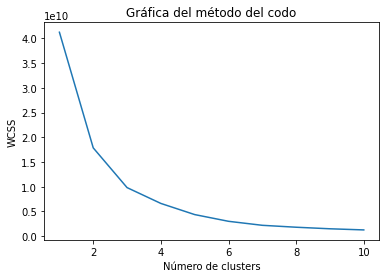

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Gráfica del método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

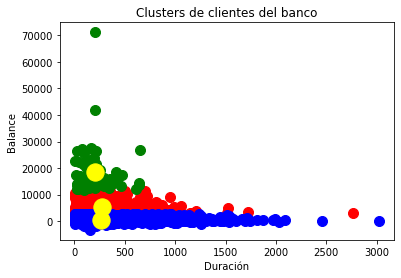

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label ='Centroids')
plt.title('Clusters de clientes del banco')
plt.xlabel('Duración')
plt.ylabel('Balance')
plt.show()

-- Analisis de Resultados --

A través del Método del Gráfico de Codo nos damos cuenta que debe separarse en 3 clusters. 

Lo que se mide es la duración de un cliente en el banco y el balance de su cuenta.

Resultaron 3 clusters. 

1.   En el cluster verde los clientes tienen el mayor balance ($10000-$30000) y llevan entre 0 y 750 días como cliente.
2.   En el cluster rojo los clientes tienen un balance menor ($5000-$10000) que el anterior y la mayoría llevan entre 0 y 1250 días como cliente.
3.   En el cluster azul los clientes tienen un balance más pequeño (Saldo negativo-$5000) y la mayoría llevan entre 0 y 2000 días como cliente 

En resumen, los clientes que mayor balance tienen en su cuenta llevan poco tiempo de haberse afiliado al banco. 

## Clustering Jerarquico

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks') #de Marco

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle

 
bank = pd.read_excel('BankCluster.xlsx')

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
label = LabelEncoder()
bank['education'] = label.fit_transform(bank['education'])
bank['default'] = label.fit_transform(bank['default'])
bank['housing'] = label.fit_transform(bank['housing'])
bank['loan'] = label.fit_transform(bank['loan'])
bank['month'] = label.fit_transform(bank['month'])

bank = pd.get_dummies(bank, drop_first=True, 
                      columns=['marital', 'contact', 'poutcome'])

y = bank['job']
X = bank.drop(labels=['job', 'y'], axis = 1)
X = shuffle(X)

X = StandardScaler().fit_transform(X)

In [ ]:
X.shape

(4521, 19)

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(X)
fig.update_layout(width=950, height=700)
fig.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 12, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)
y_hc

array([5, 9, 0, ..., 2, 5, 1])

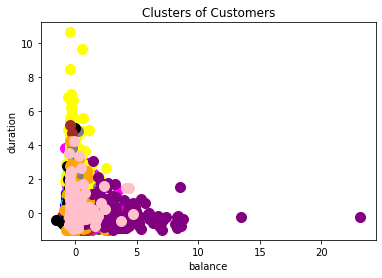

In [ ]:
plt.scatter(X[y_hc==0, 3], X[y_hc==0, 8], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 3], X[y_hc==1, 8], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 3], X[y_hc==2, 8], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 3], X[y_hc==3, 8], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 3], X[y_hc==4, 8], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_hc==5, 3], X[y_hc==5, 8], s=100, c='yellow', label ='Cluster 1')
plt.scatter(X[y_hc==6, 3], X[y_hc==6, 8], s=100, c='gray', label ='Cluster 2')
plt.scatter(X[y_hc==7, 3], X[y_hc==7, 8], s=100, c='black', label ='Cluster 3')
plt.scatter(X[y_hc==8, 3], X[y_hc==8, 8], s=100, c='brown', label ='Cluster 4')
plt.scatter(X[y_hc==9, 3], X[y_hc==9, 8], s=100, c='orange', label ='Cluster 5')
plt.scatter(X[y_hc==10, 3], X[y_hc==10, 8], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==11, 3], X[y_hc==11, 8], s=100, c='pink', label ='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('balance')
plt.ylabel('duration')
plt.show()

-- Analisis de Resultados --

Dando una mirada al dendograma es muy difícil estimar la cantidad de grupos o clusters, ya que es muy basto el dataset y para tener una vista más clara de estos clusters. Analizando la situación, se determinó utilizar 12 clusters que es lo más cercano a lo que se puede apreciar en el dendograma, aunque no es muy clara la disimilaridad entre ellos. 

Echando un vistazo a la figura plt.scatter se puede apreciar ligeramente la presencia de al menos 3 clusters con una significativa disimilaridad, aunque no es algo preciso.

## TSNE

###Obtención y preparación de los datos

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir('') #de Humberto

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
import pandas as pd

bank = pd.read_excel('BankCluster.xlsx')


In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
label = LabelEncoder()
bank['education'] = label.fit_transform(bank['education'])
bank['default'] = label.fit_transform(bank['default'])
bank['housing'] = label.fit_transform(bank['housing'])
bank['loan'] = label.fit_transform(bank['loan'])
bank['month'] = label.fit_transform(bank['month'])

bank = pd.get_dummies(bank, drop_first=True, 
                      columns=['marital', 'contact', 'poutcome'])

y = bank['job']
X = bank.drop(labels=['job', 'y'], axis = 1)
X = shuffle(X)

X = StandardScaler().fit_transform(X)

In [ ]:
bank

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,0,0,1787,0,0,19,10,79,1,-1,0,no,1,0,0,0,0,0,1
1,33,services,1,0,4789,1,1,11,8,220,1,339,4,no,1,0,0,0,0,0,0
2,35,management,2,0,1350,1,0,16,0,185,1,330,1,no,0,1,0,0,0,0,0
3,30,management,2,0,1476,1,1,3,6,199,4,-1,0,no,1,0,0,1,0,0,1
4,59,blue-collar,1,0,0,1,0,5,8,226,1,-1,0,no,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,1,0,-333,1,0,30,5,329,5,-1,0,no,1,0,0,0,0,0,1
4517,57,self-employed,2,1,-3313,1,1,9,8,153,1,-1,0,no,1,0,0,1,0,0,1
4518,57,technician,1,0,295,0,0,19,1,151,11,-1,0,no,1,0,0,0,0,0,1
4519,28,blue-collar,1,0,1137,0,0,6,3,129,4,211,3,no,1,0,0,0,1,0,0


In [ ]:
X.shape

(4521, 19)

###Aplicación del algoritmo y visualización de los datos

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
num_components=3

In [ ]:
tsne = TSNE(n_components=num_components, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4521 samples in 0.012s...
[t-SNE] Computed neighbors for 4521 samples in 0.954s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4521
[t-SNE] Computed conditional probabilities for sample 2000 / 4521
[t-SNE] Computed conditional probabilities for sample 3000 / 4521
[t-SNE] Computed conditional probabilities for sample 4000 / 4521
[t-SNE] Computed conditional probabilities for sample 4521 / 4521
[t-SNE] Mean sigma: 1.094589
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.658966
[t-SNE] KL divergence after 2000 iterations: 0.725593


In [ ]:
dFResults = pd.DataFrame(data = tsne_results
                         , columns = ['principal component '+ str(x) for x in range(1,num_components+1)])

dFResults = pd.concat([dFResults, bank[['job']]], axis = 1)
px.scatter_3d(dFResults, title='t-SNE with perplexity 40', 
              x='principal component 1',y='principal component 2',
              z='principal component 3', color='job')

In [ ]:
tsne = TSNE(n_components=num_components, verbose=1, perplexity=25, n_iter=1000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 4521 samples in 0.043s...
[t-SNE] Computed neighbors for 4521 samples in 0.997s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4521
[t-SNE] Computed conditional probabilities for sample 2000 / 4521
[t-SNE] Computed conditional probabilities for sample 3000 / 4521
[t-SNE] Computed conditional probabilities for sample 4000 / 4521
[t-SNE] Computed conditional probabilities for sample 4521 / 4521
[t-SNE] Mean sigma: 0.972654
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.424034
[t-SNE] KL divergence after 1000 iterations: 0.784226


In [ ]:
dFResults = pd.DataFrame(data = tsne_results
                         , columns = ['principal component '+ str(x) for x in range(1,num_components+1)])

dFResults = pd.concat([dFResults, bank[['job']]], axis = 1)
px.scatter_3d(dFResults, title='t-SNE with perplexity 25', 
              x='principal component 1',y='principal component 2',
              z='principal component 3', color='job')

In [ ]:
tsne = TSNE(n_components=num_components, verbose=1, perplexity=50, n_iter=1500)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4521 samples in 0.027s...
[t-SNE] Computed neighbors for 4521 samples in 1.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4521
[t-SNE] Computed conditional probabilities for sample 2000 / 4521
[t-SNE] Computed conditional probabilities for sample 3000 / 4521
[t-SNE] Computed conditional probabilities for sample 4000 / 4521
[t-SNE] Computed conditional probabilities for sample 4521 / 4521
[t-SNE] Mean sigma: 1.154897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.121170
[t-SNE] KL divergence after 1500 iterations: 0.714489


In [ ]:
dFResults = pd.DataFrame(data = tsne_results
                         , columns = ['principal component '+ str(x) for x in range(1,num_components+1)])

dFResults = pd.concat([dFResults, bank[['job']]], axis = 1)
px.scatter_3d(dFResults, title='t-SNE with perplexity 50', 
              x='principal component 1',y='principal component 2',
              z='principal component 3', color='job')

###Analisis de Resultados

Tomando de hipotesis que la cantidad de componentes con mejores resultados son 3, se realizan 3 pruebas donde se cambian los hiperparametros "perplexity" y "n_iter".

Según los 3 plots realizados en este algoritmo, 3 componentes son la cantidad adecuada para realizar un buen conjunto de datos, pues notamos que sin importar los cambios de hiperparametros, estos conjuntos no parecen dar cambios notorios.

Por lo que, se concluye con t-SNE, reducir nuestro conjunto de datos a 3 dimensiones nos daria resultados bastantes aceptables si lo sometieramos a un algoritmo de aprendizaje supervisado.

#CONCLUSIONES GENERALES

En todos los algoritmos no supervisados aplicados en este notebook, se concluye que con 3 clusters podemos describir nuestro conjunto de datos perfectamente, pues esta cantidad nos dice correctamente la relación entre la cantidad de clientes cuya dismilaridad es mas notable aunque con una baja varianza.

Por lo tanto, si aplicaramos un algoritmo de aprendizaje supervisado al dataset "BankCluster.csv" con 3 componentes principales al momento de entrenar el modelo y predecir futuros resultados, dicho modelo mostraría un resultado aceptable.